# Exercise 3: Multi-Class Classification and Neural Networks

In [21]:
import os

import numpy as np

import matplotlib.pyplot as plt

from scipy import optimize

from scipy.io import loadmat
from scipy.special import expits

import utils

%matplotlib inline

In [22]:
input_layer_size = 400

num_labels = 10

data = loadmat(os.path.join("data", "ex3data1.mat"))
X, y = data['X'], data['y'].ravel()

y[y == 10] = 0

m = y.size

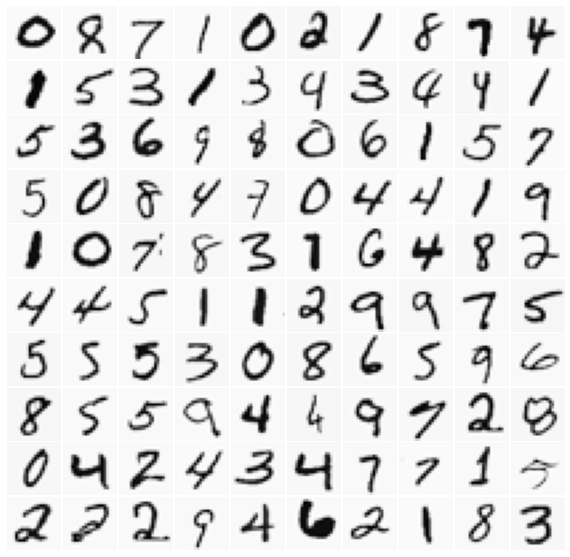

In [23]:
# Randomly select 100 data points to display
rand_indices = np.random.choice(m, 100, replace=False)
sel = X[rand_indices, :]

utils.displayData(sel)

# Vectorizing Logistic Regression

In [24]:
# test values for parameters theta
theta_t = np.array([-2, -1, 1, 2], dtype=float)

# test values for inputs
X_t = np.concatenate([np.ones((5, 1)), np.arange(1, 16).reshape(5, 3, order='F')/10.0], axis=1)

# test values for labels 
y_t = np.array([1, 0, 1, 0, 1])

# test value for regularization parameter
lambda_t = 3

In [25]:
def h(theta, X):
    """Hypothesis function and cost function for logistic regression."""
    return expit(np.dot(X, theta))

def lrCostFunction(theta, X, y, lambda_):
    """Computes the cost of using theta as the parameter for regularized logistic regression
    and gradient of the cost wrt to the parameters theta."""
    # initialize some useful values
    m = X.shape[0]
    
    if y.dtype == bool:
        y = y.astype(int)
    
    J = 0
    grad = np.zeros(theta.shape)
    
    myh = h(theta, X)
    # computing cost
    term1 = np.log(myh).dot(-y.T)
    term2 = np.log(1.0 - myh).dot(1 - y.T)
    left_hand = (term1 - term2) / m
    right_hand = theta.T.dot(theta) * lambda_ / (2 * m) 
    
    J = left_hand + right_hand
    
    # computing gradient
    beta = h(theta, X)-y.T
    
    regterm = theta[1:]*(lambda_ / m)
    grad = (1./m)*np.dot(X.T, beta)
    grad[1:] = grad[1:] + regterm
    
    return J, grad

In [26]:
J, grad = lrCostFunction(theta_t, X_t, y_t, lambda_t)

print('Cost     : {:6f}'.format(J))
print('Expected cost: 2.534819')
print('-------------------------')
print('Gradients:')
print(' [{:6f}, {:6f}, {:6f}, {:6f}]'.format(*grad))
print('Expected gradients:')
print(' [0.146561, -0.548558, 0.724722, 1.398003]')

Cost     : 3.734819
Expected cost: 2.534819
-------------------------
Gradients:
 [0.146561, -0.548558, 0.724722, 1.398003]
Expected gradients:
 [0.146561, -0.548558, 0.724722, 1.398003]


In [58]:
def oneVsAll(X, y, num_labels, lambda_):
    """Trains num_lables logistic regression classifiers and returns each of these classifiers
    in a matrix all_theta."""
    m, n = X.shape
    
    initial_theta = np.zeros((n, 1))
    all_theta = np.zeros((num_labels, n))
    options = {'maxiter': 500}
    
    for i in np.arange(1, num_labels + 1):
        print('Optimizing')
        reg_logistic_regression = optimize.minimize(lrCostFunction, initial_theta, (X, (y == i)*1, lambda_), jac=True, options=options)
        all_theta[i  - 1] = reg_logistic_regression.x

    return all_theta

In [60]:
lambda_ = 0.1
all_theta = oneVsAll(X, y, num_labels, lambda_)

Optimizing
Optimizing
Optimizing
Optimizing
Optimizing
Optimizing
Optimizing
Optimizing
Optimizing
Optimizing


In [75]:
def predictOneVsAll(all_theta, X):
    """Return a vector of predictions for each example in matrix X."""    
    p = 1 / (1 + np.exp(-(X.dot(all_theta.T))))
    
    return (np.argmax(p, axis=1) + 1)

In [76]:
pred = predictOneVsAll(all_theta, X)
pred.shape

(5000,)

In [77]:
training_accuracy = np.mean((y == pred) * 100)
print(training_accuracy)

85.96


# Neural Networks

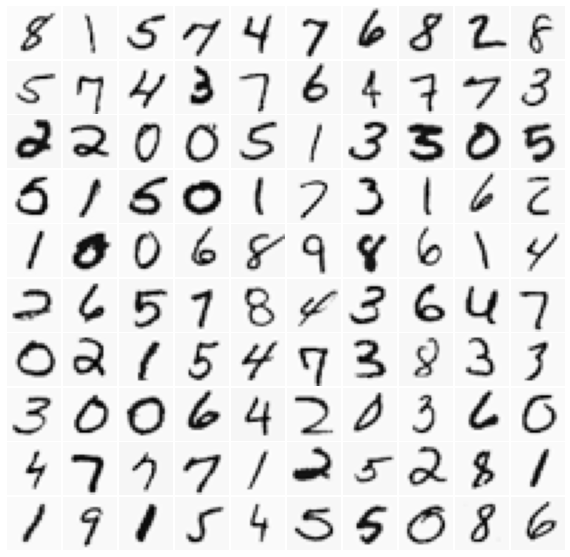

In [121]:
# training data stored in arrays
data = loadmat(os.path.join('data', 'ex3data1.mat'))
X, y = data['X'], data['y'].ravel()

y[y == 10] = 0

m = y.size

indices = np.random.permutation(m)

rand_indices = np.random.choice(m, 100, replace=False)
sel = X[rand_indices, :]

utils.displayData(sel)

In [122]:
weights = loadmat(os.path.join('data', 'ex3weights.mat'))

Theta1, Theta2 = weights['Theta1'], weights['Theta2']

# Feedforward Propagation and Prediction